# Introduction to Sklearn

 0. workflow
 1. getting data ready
 2. choose right estimator or model
 3. fit to the model
 4. Evaluating model
 5. improve the model
 6. save and load trained model
 7. putting it all together

 # 0 :- Workflow

In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [342]:
# Reading CSV
heart_disease = pd.read_csv("./data/heart.csv")
heart_disease.head() # want to predic target

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [343]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [344]:
X = heart_disease.drop("target", axis = 1) #feature matrix

In [345]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [346]:
Y = heart_disease['target']
(Y==0).sum() 

499

# Choosing Model and hyperparameters

In [347]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # clf is a classifier

In [348]:
clf.get_params() #list of parameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Fitting model to training data

In [349]:
from sklearn.model_selection import train_test_split

In [350]:
np.random.seed(72)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3) 

In [351]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((717, 13), (717,), (308, 13), (308,))

In [352]:
X.shape[0]*0.7 #x_train size

717.5

In [353]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
95,45,0,0,138,236,0,0,152,1,0.2,1,0,2
507,41,0,1,130,204,0,0,172,0,1.4,2,0,2
804,58,0,0,130,197,0,1,131,0,0.6,1,0,2
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
714,51,1,3,125,213,0,0,125,1,1.4,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,56,1,1,120,236,0,1,178,0,0.8,2,0,2
74,48,1,0,130,256,1,0,150,1,0.0,2,2,3
46,41,1,1,135,203,0,1,132,0,0.0,1,0,1
787,51,1,0,140,298,0,1,122,1,4.2,1,3,3


In [354]:
X_test # both X_test and Y_test will have same index numbers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
419,65,0,2,160,360,0,0,151,0,0.8,2,0,2
499,46,0,2,142,177,0,0,160,1,1.4,0,0,2
648,71,0,0,112,149,0,1,125,0,1.6,1,0,2
651,41,1,1,120,157,0,1,182,0,0.0,2,0,2
239,62,0,0,150,244,0,1,154,1,1.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,38,1,2,138,175,0,1,173,0,0.0,2,4,2
113,57,1,0,110,335,0,1,143,1,3.0,1,1,3
893,52,1,0,128,204,1,1,156,1,1.0,1,0,0
603,63,0,1,140,195,0,1,179,0,0.0,2,2,2


In [355]:
clf.fit(X_train,Y_train); #Training the Classifier Model

In [356]:
y_predicted = clf.predict(X_test) # Using Model to Predict

In [357]:
print(y_predicted[0:10])
print(Y_test[0:10])

[1 1 1 1 0 0 0 1 0 1]
419    1
499    1
648    1
651    1
239    0
206    0
469    0
647    1
382    0
814    1
Name: target, dtype: int64


# Evaluating Accuracy of the model

In [358]:
clf.score(X_train,Y_train) # 100 % accuracy on training dataset

1.0

In [359]:
df= pd.DataFrame(clf.predict_proba(X_test)) #retuens array of probablities
df.rename(columns={0:"No Heart Disease (0)",1:'Heart Disease (1)'},inplace=True)

In [360]:
df

,No Heart Disease (0),Heart Disease (1)
0,0.04,0.96
1,0.23,0.77
2,0.03,0.97
3,0.01,0.99
4,0.96,0.04
...,...,...
303,0.01,0.99
304,1.00,0.00
305,0.93,0.07
306,0.09,0.91


Show how Certain the model is predicting heart disease it makes the model more reliable

# Evaluation of model

<b>Accuracy</b>

In [361]:
clf.score(X_test,Y_test)

1.0

In [362]:
np.random.seed(72)
from sklearn.model_selection import cross_val_score
print(f"mean(accuracy)Cross val Score:{cross_val_score(clf,X,Y,cv=10).mean()*100}%,Normal Score can be misleading :{clf.score(X_test,Y_test)*100}%")

mean(accuracy)Cross val Score:99.70588235294117%,Normal Score can be misleading :100.0%


The model is highly reliabale as mean Cross val Score:99.70588235294117% when cv = 10

**Area under Roc(Receiver operationg charecteristics) Curve**

In [363]:
from sklearn.metrics import roc_curve

In [364]:
y_prob = clf.predict_proba(X_test)

In [365]:
y_proba_postive = y_prob[:,1]
y_proba_postive[10]

0.95

In [366]:
fpr,tpr,threshold = roc_curve(Y_test,y_proba_postive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04081633, 0.06802721,
       0.08163265, 0.10204082, 0.11564626, 0.13605442, 0.14285714,
       0.15646259, 0.19727891, 0.2244898 , 0.24489796, 0.25170068,
       0.27891156, 0.40136054, 0.46938776, 0.56462585, 0.59863946,
       0.7414966 , 1.        ])

In [367]:
# Plotting Roc curve
import matplotlib.pyplot as plt
def plotroc(fpr,tpr):
    """"
    Plots Roc curve using fpr and tpr

    """
    plt.plot(fpr,tpr,color="red",label="ROC")
    # plotting baseline
    plt.plot([0,1],[0,1],color="darkblue",linestyle = ':',label ="Baseline")
    plt.xlabel("False postive rate")
    plt.ylabel("True postive rate")
    plt.title("ROC Curve Analysis")
    plt.legend()
    plt.show()

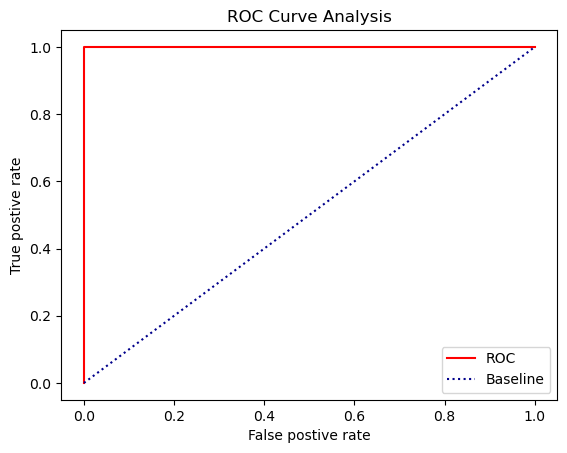

In [368]:
plotroc(fpr,tpr)

In [379]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_proba_postive)

1.0

**classification_report**

In [369]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [370]:
print(classification_report(Y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       161

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308



**confusionmatrix**

In [382]:
cm = confusion_matrix(Y_test,y_predicted)
print(cm)

[[147   0]
 [  0 161]]


In [372]:
print(accuracy_score(Y_test,y_predicted)) #same as clf.score()

1.0


Install seaborn if required

In [ ]:
# !pip install seaborn

In [384]:
# import seaborn as sns
# sns.set(font_scale=1.5)
# sns.heatmap(cm)

# Trying to improve model 

Done by adjusting a hyper parameter n_estimators

In [373]:
# np.random.seed(50)

In [374]:
# np.random.seed(78)
# for i in range(5,100,5):
#     print(f"Trying model with n_estimators={i}")
#     clf = RandomForestClassifier(n_estimators = i)
#     clf.fit(X_train,Y_train)
#     print(f"Accuracy :{clf.score(X_test,Y_test)*100:.2f}%")
#     print("")
    

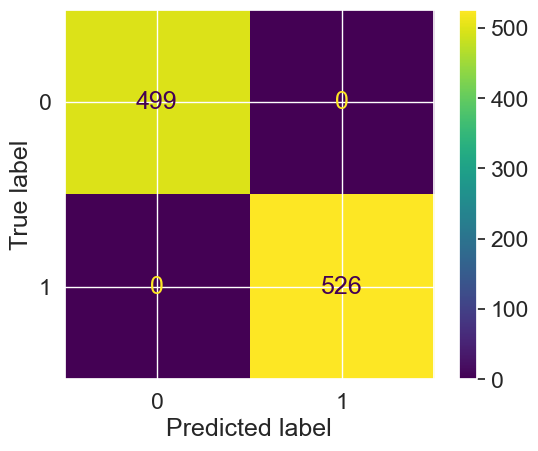

In [390]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf,X,Y);#uses whole dataset and estimator

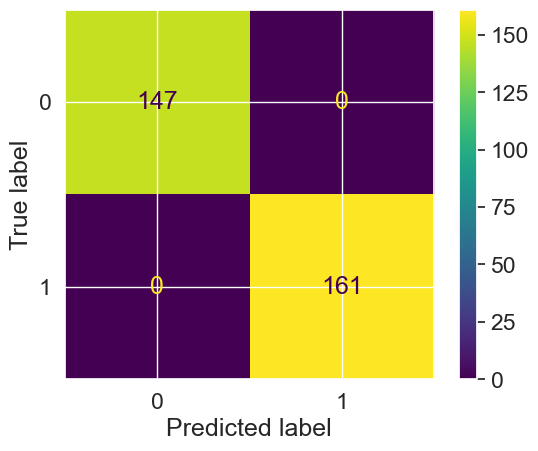

In [391]:
ConfusionMatrixDisplay.from_predictions(Y_test,y_predicted);#From Predictions uses testing data

# Saving the model using Pickle


In [375]:
import pickle

In [376]:
pickle.dump(clf,open("./Trained_Model/heart_model.pkl","wb")) #wb stands for write binary